# Laboratory 1.2

Welcome to Lab 1.2. In this lab, we will learn about the Canny edge detection algorithm, the processing steps involved, and how to apply Canny edge detection to real-world images and videos.

## Overview

You might not know this, but when it comes to image recognition, the human eye takes only a few milliseconds to process and identify the content of an image. This remarkable ability can be achieved whether the data is a drawing or a photograph. This is also the goal of computer vision. One of the current ideas is to develop an algorithm that can outline the edges of any object in an image using the Canny edge detection algorithm.

First, it's essential to understand what the Canny edge detection algorithm is:

The Canny edge detector is an algorithm that involves multiple stages to detect a wide range of edges in an image. It was developed by John F. Canny in 1986. Canny also proposed a computational theory of edge detection that explains why this technique works.

## Learning Objectives

Upon completing this exercise, learners will gain knowledge of:
  - A deeper understanding of the Canny algorithm
  - How to program the processing steps in the Canny algorithm for edge detection

## Related Knowledge

  - Python
  - Image processing
  - OpenCV

## Required Background

To complete this exercise, you will need the following knowledge:
  - Basic programming skills with Python

## Problem Statement

**Objective**: Identify edges in the input image/video using the Canny algorithm.

**Requirements**
- Input: Image or video.
- Output: Image or video processed using Canny edge detection.

## Instructions

Below is a detailed guide on how to program and apply the Canny edge detection algorithm in practice.


### Libraries



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading Images

The **`cv2.imread()`** function is used to read the input image/video file.

The **`cv2_imshow()`** function displays the image on the interface window.

In [ ]:
image_path = [...]
# Read the image and return a 3-dimensional matrix corresponding to the color channels B,G,R
img = cv2.imread(image_path)

# Display the image in a window named "Image"
cv2.imshow("Image",img)

# Wait for the user to press any key to close the window
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

### Gaussian Blur

#### Theory

Eliminating noise is crucial in the edge detection process. A useful method is applying a Gaussian filter. This is done by convolving the image with a Gaussian kernel (with sizes like 3×3, 5×5, 7×7, etc.). The kernel size depends on the desired blurring effect. Essentially, the smaller the kernel, the less blurring effect it will produce.

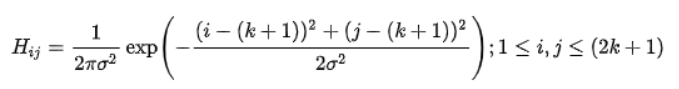

#### Practice

The **`cv2.GaussianBlur`** function applies a Gaussian filter to blur the image, which helps reduce noise and smooth the edges.

The function includes three parameters:

- `image`: The input image that needs to be blurred.
- `kernel_size`: The size of the kernel used for blurring the image. The kernel is a square matrix with the side length being `kernel_size`. This size must be an odd number and greater than 1, such as (3, 3), (5, 5), etc.
- `sigma`: The standard deviation of the Gaussian, which determines the level of blurring in the image. If `sigma` is 0, it will be calculated automatically from the kernel size.




**Exercise 1:** Complete the following code by filling in the [...].

Try selecting and applying the Gaussian filter with different parameters to observe the impact of each parameter.

In [ ]:
def gaussian_blur(image, kernel_size=[...], sigma=[...]):
    return cv2.GaussianBlur([...], ([...], [...]), [...])

In [ ]:
# Load image and convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_image = gaussian_blur(gray_image)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(gray_image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(blurred_image, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Gradient Calculation


#### Theory

Calculating the gradient of an image helps to identify the change in intensity at each point in the image to determine edges. To do this most easily, we use the Sobel filter, which highlights intensity changes across both the horizontal (x) and vertical (y) axes.

After the image has been smoothed, we calculate the derivatives in the x-direction (`Ix`) and y-direction (`Iy`). This will allow us to determine the magnitude and direction of the gradient.



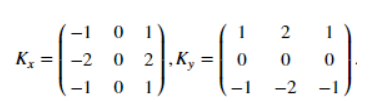

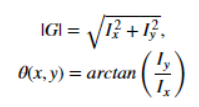

<!-- Sau khi áp dụng các bước trên, chúng ta thu được hình ảnh như sau:

--- Ảnh kết quả mẫu

Có thể thấy, hình ảnh thu được khá hoàn hảo. Tuy nhiên chúng ta còn 2 vấn đề là không đồng nhất giữa độ dày và độ sáng các cạnh. -->

#### Practice

To calculate the gradient of an image and determine the intensity change at each point, this process involves two main steps:

1. Calculating the first derivative of the image:
- The `cv2.Sobel` function calculates the first derivative of the image using the Sobel filter, enabling edge detection in the image.
- This function has five parameters:
    - `image`: The input image.
    - The data type of the output image, typically `CV_64F` is used for higher precision because the gradient values can be negative.
    - These parameters define the direction of the derivative. `1, 0` calculates the derivative in the x-direction, while `0, 1` calculates the derivative in the y-direction.
    - `ksize`: The size of the Sobel kernel. This is typically an odd number, such as 3, 5, 7, etc.

2. Calculating the magnitude and direction of the gradient

- This step uses the `np.hypot` and `np.arctan2` functions, with the inputs being the results from the Sobel filters. This allows you to calculate the magnitude and direction of the gradient, providing information on how pixel values are changing in the image. 

This approach is crucial in edge detection, as it reveals the boundaries within an image based on intensity variations.

**Exercise 2:** Complete the following code by filling in the [...].

In [ ]:
def gradient(image):
    sobelx = cv2.Sobel([...], [...], [...], [...], ksize=[...])
    sobely = cv2.Sobel([...], [...], [...], [...], ksize=[...])
    gradient_magnitude = np.hypot([...], [...])
    gradient_direction = np.arctan2([...], [...])
    return gradient_magnitude, gradient_direction

In [ ]:
gradient_magnitude, gradient_direction = gradient(blurred_image)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(blurred_image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(gradient_magnitude, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Non-maximum Suppression


#### Theory

To achieve the best results, the final image should retain only the local maxima points in the gradient magnitude. 

**Principle:** The algorithm scans all the points in the gradient magnitude matrix and identifies the pixels with the highest values in the direction of the edges.


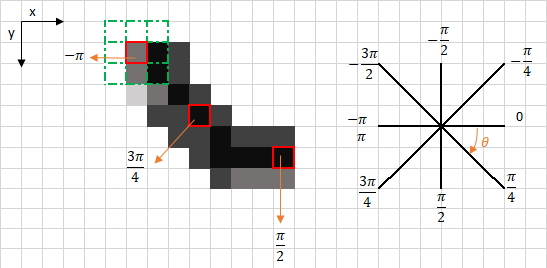

The red box in the top left corner represents a pixel intensity in the Gradient Magnitude matrix currently being processed. The corresponding gradient direction is represented by an orange arrow with an angle of -π radians (+/- 180 degrees).

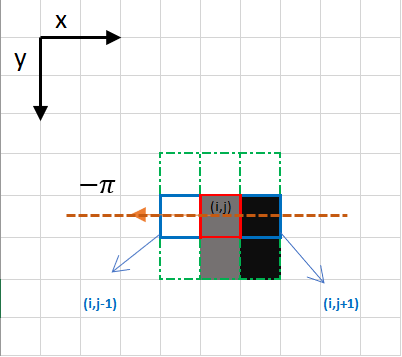

The gradient direction is indicated by the dotted orange line (horizontal from left to right). The purpose of the algorithm is to check if the pixels along the same direction have a higher or lower intensity than the pixel currently being processed. In the example above, the pixel (i, j) is being processed, and the pixels along the same direction are marked in blue as (i, j-1) and (i, j+1). If either of these pixels has a higher intensity than the one being processed, then only the pixel with the higher intensity is retained. The pixel (i, j-1) appears brighter since it is white (value 255). Therefore, the intensity value of the current pixel (i, j) is set to 0. If neither of the pixels in the edge direction has a higher intensity value, then the value of the current pixel remains unchanged.

<!-- --- Kết quả thuật toán

Kết quả trả về là một hình ảnh với các cạnh mỏng hơn. Tuy nhiên vẫn còn sự không đồng đều giữa các cạnh. Việc này sẽ được khắc phục ở 2 bước cuối. -->

#### Practice

To summarize, each pixel is evaluated based on two main criteria (edge direction in radians and pixel intensity ranging from 0–255). Based on these inputs, the steps of non-maximum suppression are:

- Create a matrix initialized with 0 having the same size as the original gradient intensity matrix.
- Determine the gradient direction based on the angle value from the angle matrix.
- Check if the pixel in the same direction has a higher intensity than the currently processed pixel.
- Return the image processed by the non-maximum suppression algorithm.


**Exercise 3:** Complete the following code.

In [ ]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    M, N = gradient_magnitude.shape
    Z = np.zeros((M, N), dtype=np.float32)
    angle = gradient_direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                ### Your code starts here ###
                # Angle 0

                # Angle 45

                # Angle 90

                # Angle 135

                ### Your code ends here ###

                if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                    Z[i, j] = gradient_magnitude[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

In [ ]:
nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(gradient_magnitude, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(nms_image, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Double Threshold


#### Theory

This step categorizes pixels into three types: strong, weak, and non-edges.

Apply two thresholds: high threshold and low threshold.
- Pixels with values greater than the high threshold are considered strong edges.
- Pixels with values between the high and low thresholds are considered weak edges.
- Pixels with values below the low threshold are discarded.


#### Practice

**Exercise 4:** Complete the following code by filling in the [...].

Choosing the right threshold directly affects the output result as it is the basis for determining which pixels are edges. Experiment with different values to find the parameter pair that best suits the input image.


In [ ]:
def double_threshold(image, low_threshold, high_threshold):
    strong = [...]
    weak = [...]
    strong_i, strong_j = np.where([...])
    weak_i, weak_j = np.where([...])

    result = np.zeros_like(image)
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return result

In [ ]:
low_threshold = [...]
high_threshold = [...]
thresholded_image = double_threshold(nms_image, low_threshold, high_threshold)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(nms_image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Edge Tracking by Hysteresis


#### Theory

The goal of this step is to identify weak edges that are connected to strong edges.

- Weak edges connected to strong edges are considered true edges.
- Use depth-first search or breadth-first search to connect edges.

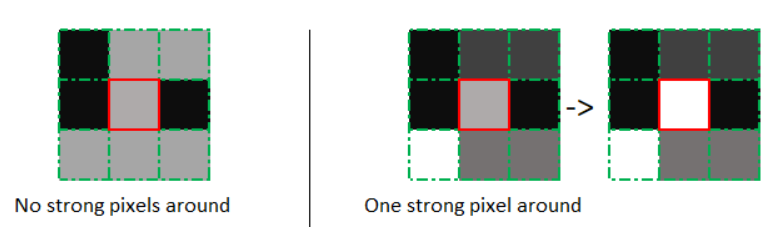

#### Practice

**Exercise 5:** Complete the following code by filling in the [...].


In [ ]:
def edge_tracking(image, weak=50, strong=255):
    M, N = image.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            ### Your code starts here ###

            ### Your code ends here ###
    return image

In [ ]:
final_image = edge_tracking(thresholded_image)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(thresholded_image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(final_image, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Combining All Steps

#### Practice

Here’s how to combine all the steps into a single function to apply the Canny edge detection algorithm.

**Exercise 6:** Complete the following code by filling in the [...].


In [ ]:
def canny_edge_detection(image, low_threshold_ratio=[...], high_threshold_ratio=[...], sigma=[...]):

    # Blur the image by applying a Gaussian filter
    blurred_image = [...]

    # Calculate Gradient
    gradient_magnitude, gradient_direction = [...]

    # Non-maximum Suppression
    nms_image = [...]

    # Select threshold
    low_threshold = [...]
    high_threshold = [...]

    # Edge tracking
    thresholded_image = [...]
    final_image = [...]
    return final_image

In [ ]:
# Load image and convert to grayscale
image = cv2.imread([...], cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image)

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(edges, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Using the Built-in Function in the OpenCV Library


#### Theory

In the OpenCV library, there is a built-in function **`cv2.Canny()`**. To use this function, you need to pass three variables to it:

- `img`: The input image (grayscale image).
- `threshold1`: The lower threshold for the hysteresis procedure.
- `threshold2`: The upper threshold for the hysteresis procedure.


#### Practice

**Exercise 7:** Complete the following code by filling in the [...].

Try selecting and applying different threshold levels to observe the impact of each parameter.


In [ ]:
# Read and convert image to grayscale
image = cv2.imread([...])
canny_img = cv2.Canny([...])

#### Result

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show the first image
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')  # Turn off axis display

# Show the second image
axs[1].imshow(canny_img, cmap='gray')
axs[1].axis('off')  # Turn off axis display

# Display figure
plt.show()

### Applying Canny to Video

#### Theory

We will go through the following steps:

- **Reading the video:**
  - `cv2.VideoCapture()`: Opens the input video.

- **Getting video information:**
  - `frame_width`, `frame_height`, `fps`: Retrieve the frame size and frames per second (fps) of the input video.
  - `fourcc`: The codec format for the output video.

- **Creating a VideoWriter:**
  - `cv2.VideoWriter()`: Creates an object to write the output video.

- **Processing each frame in a loop:**
  - `cv2.cvtColor()`: Converts the frame to a grayscale image.
  - Pass each frame through the Canny algorithm in two ways of your choice: either using the custom function you just created (`canny_edge_detection()`) or using the built-in OpenCV function (`cv2.Canny()`).

- **Releasing resources:**
  - `cap.release()`, `out.release()`, `cv2.destroyAllWindows()`: Close resources.


#### Practice

**Exercise 8:** Complete the following code by filling in the [...].

Using the knowledge and processing workflow provided, complete the loop to process each frame of the video.


In [ ]:
# Path to input video and output video
input_video_path = [...]
output_video_path = [...]

# Open input video
cap = cv2.VideoCapture(input_video_path)

# Get information about the format of the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object to write the output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = [...]

    # Method 1: Apply self-coded Canny edge detection filter
    # edges = [...]

    # Method 2: Apply the Canny edge detection filter available in the library
    edges = [...]

    # Record processed frames to output video
    out.write(edges)

# Free up resources
cap.release()
out.release()
cv2.destroyAllWindows()
